# Elon Ifrah - 207633017 Final Project

## Libraries

In [1]:
#Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score,f1_score,classification_report
pd.options.mode.chained_assignment = None  # default='warn'

## Section One (Intro)

#### Subject Matter

Counter Strike (CS) is a first-person shooter gameplay which was launched in 1999. Initially, it was considered as a mod of the game Half-Life but as the game progressed from beta to full release, it set its own benchmark and standards which somehow built its dedicated player community around the world that has followed since the release of its first version.

It is an objective based gameplay with multiplayer option. A player chooses to be part of one of the two teams which are terrorists and counter terrorists. Each team have their own individual objectives which the player has to complete in order to win. When a round between the two teams is finished, the players are rewarded based on the individual performances with various game weapons and in game currency.

Counter Strike: Global Offensive (CS: GO) is one of the expansions to the original Counter Strike. It features new maps, characters, weapons and better graphics which is to improve the experience of the player. It has also introduced new game modes, online matchmaking, and Competitive skill groups.




#### Breakdown of features and its types

### Abbreviations of Prefix:

***ct:*** Counter Terrorists
***t:*** Terrorists

### Features

***Time left:*** A continuous variable which demonstrates seconds left for the game to end.

***t_score and ct_score:*** Continuous variables which represents terrorists and counter terrorists score respectively.

***Map:*** Categorical Variable which represents the map chosen for that specific round.

***bomb_placed:*** A binary variable (bool) which represents that have the terrorists planted the bomb or not.

***ct_defuse_kits:*** An integer variable which represents the number of bomb diffusion kits the counter terrorists have in that specific round.

***t_health and ct_health:*** Continuous variables which represents terrorists and counter terrorists health out of 500 respectively.

***t_armor and ct_armor:*** Continuous variables which represents terrorists and counter terrorists armor out of 500 respectively.

***t_money and ct_money:*** Continuous variables which represents terrorists and counter terrorists money respectively.

***t_helmet and ct_helmet:*** Integer variables which represents terrorists and counter terrorists number of helmets respectively.

***t_players_alive and ct_players_alive:*** Integer variables which represents terrorists and counter terrorists number of players alive respectively.

***t_grenade_hegrenade and ct_grenade_hegrenade:*** Integer variables which represents terrorists and counter terrorists number of hegrenades respectively.

***t_grenade_flashbang and ct_grenade_flashbang:*** Integer variables which represents terrorists and counter terrorists number of flashbang grenades respectively.

***t_grenade_smokegrenade and ct_grenade_smokegrenade:*** Integer variables which represents terrorists and counter terrorists number of smoke grenades respectively.

***t_grenade_incendiarygrenade and ct_grenade_incendiarygrenade:*** Integer variables which represents terrorists and counter terrorists number of incendiary grenades respectively.

***t_grenade_molotovgrenade and ct_grenade_molotovgrenade:*** Integer variables which represents terrorists and counter terrorists number of molotov grenades respectively.

***t_grenade_decoygrenade and ct_grenade_decoygrenade:*** Integer variables which represents terrorists and counter terrorists number of decoy grenades respectively.

***round_winner:*** Categorical which represents the winner of that specific round out of the two competing teams.

















#### Size of Data Set

In [2]:
#read file csv
df = pd.read_csv('csgo2.csv')

data = df
print("There are {} rows and {} columns in the data set".format(len(data),len(data.columns)))



There are 122410 rows and 29 columns in the data set


## Section Two (Data Analysis)


#### Missing

In [3]:
missing_percent = round(data.isna().sum()/(len(data))*100,2)
print("Column with lowest amount of missings contains {} % missings.".format(missing_percent.min()))
print("Column with highest amount of missings contains {} % missings.\n".format(missing_percent.max()))
print(missing_percent)

Column with lowest amount of missings contains 0.0 % missings.
Column with highest amount of missings contains 18.06 % missings.

time_left                        0.00
ct_score                         1.97
t_score                         12.06
map                              0.00
bomb_planted                    18.05
ct_health                        0.00
t_health                        18.06
ct_armor                         0.00
t_armor                          4.96
ct_money                         0.00
t_money                          0.00
ct_helmets                       8.96
t_helmets                        0.00
ct_defuse_kits                   9.09
ct_players_alive                 2.03
t_players_alive                  1.98
ct_grenade_hegrenade            17.89
t_grenade_hegrenade              9.01
ct_grenade_flashbang             0.00
t_grenade_flashbang              0.00
ct_grenade_smokegrenade          0.00
t_grenade_smokegrenade           4.90
ct_grenade_incendiarygrenade     0

#### Handling Missing Data

Looking at the result of missing values. I can conclude that out of the 29 variables, 13 of them have several missing values. Some columns have few missing values compared to the other columns which means that different missing values strategies will be needed for different columns. I plan to drop the rows based on the columns which contribute less than 3% of all the missing values. There are 4 columns which fall into this criteria which are ct_score, ct_players_alive,t_players_alive and t_grenade_molotovgrenade.

For the remaining observations which have missing values, I plan to impute new values in the empty slots. There are various strategies to impute the missing values like:

1.	A constant value that has meaning within the domain, such as 0,     distinct from all other values.
2.	A value from another randomly selected record.
3.	A mean, median or mode value for the column.
4.	A value estimated by another predictive model.

I am implementing the mean, median or mode approach based on the column type to impute the missing values. 

In [4]:
#Dropping those rows from columns which contribute less than 3% of the missing values
data = data.dropna(subset=['ct_score', 'ct_players_alive','t_players_alive','t_grenade_molotovgrenade'])

In [5]:
#Imputing the missing values using the mean, median or mode approach.
data.t_score.fillna(data.t_score.mean(),inplace=True)

data.bomb_planted.fillna(data.bomb_planted.mode().iloc[0],inplace=True)

data.t_health.fillna(data.t_health.mean(),inplace=True)

data.t_armor.fillna(data.t_armor.mean(),inplace=True)

data.ct_helmets.fillna(data.ct_helmets.mode().iloc[0],inplace=True)

data.ct_defuse_kits.fillna(data.ct_defuse_kits.mode().iloc[0],inplace=True)

data.ct_grenade_hegrenade.fillna(data.ct_grenade_hegrenade.mode().iloc[0],inplace=True)

data.t_grenade_hegrenade.fillna(data.t_grenade_hegrenade.mode().iloc[0],inplace=True)

data.t_grenade_smokegrenade.fillna(data.t_grenade_smokegrenade.mode().iloc[0],inplace=True)


#### Outliers

Considering the variable types in the data and their ranges, I believe that different strategies will be used for various variables. 

I believe there will be no outlier constraints at all for the variables time left, map and bomb placed for the nature of variable they are. 2 out of the 3 variables I mentioned are categorical as well.

Considering the variables health, armor, and players alive for both the teams, I think there will be no outliers because these variables fall under a specific range. Health and armor for both the teams can only be between 0-500 meanwhile players_alive can only be 0-5 because their cannot be more than 5 members in a team. I plan to make sure that those observations are removed where values fall out of the ranges of the variables mentioned above.

For the variables defuse kits, helmets and all the grenade types for both the teams, there is not much variance and the range of the data is very small. Hence, it is very unlikely to be an outlier in these variables.

The variables I believe might be having any outliers are money and score for both the teams. I will use the box plot to check for any outliers and if the result is positive, I will remove the outliers using the Inter Quartile range approach.

In [6]:
#Making sure the their is no value falling outside the range of 0-500 in health and armor  and 0-5 for players alive for both the teams.
data = data[
     (data['t_health'] >= 0) | (data['t_health'] <= 500) &
     (data['ct_health'] >= 0) | (data['ct_health'] <= 500) &
     (data['t_armor'] >= 0) | (data['t_armor'] <= 500) &
     (data['ct_armor'] >= 0) | (data['ct_armor'] <= 500) &
     (data['t_players_alive'] >= 0) | (data['t_players_alive'] <= 5) &
     (data['ct_players_alive'] >= 0) | (data['ct_players_alive'] <= 5)
    ] 

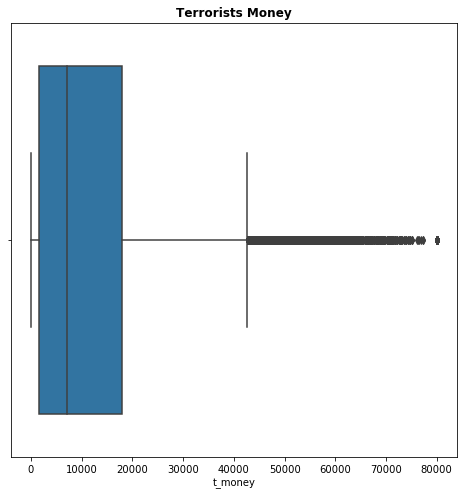

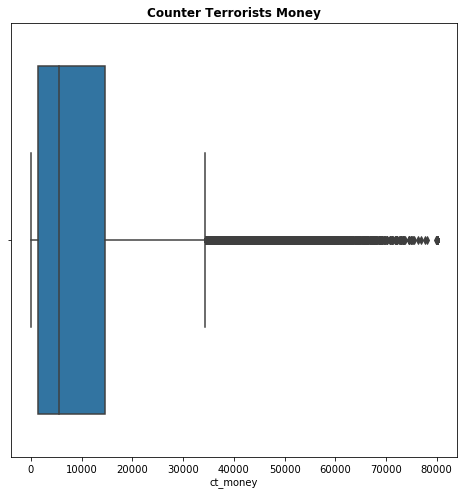

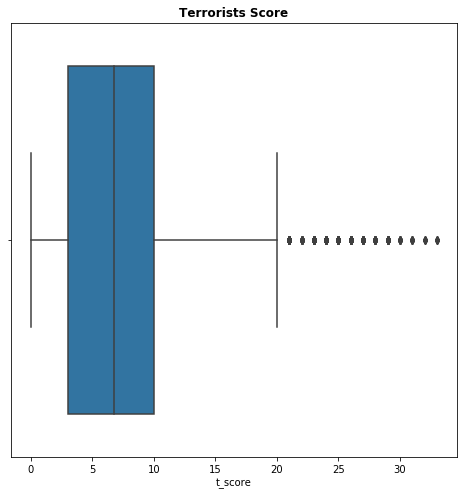

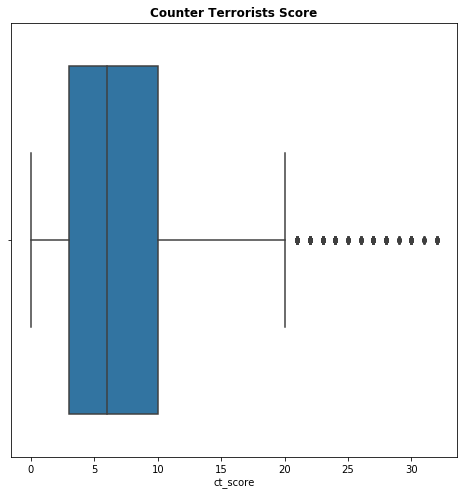

In [7]:


fig, ax = plt.subplots(figsize=(8,8))
t_money_box = sns.boxplot(x=data['t_money'],ax=ax)
plt.title("Terrorists Money",fontweight='bold')
plt.show(t_money_box)

fig, ax = plt.subplots(figsize=(8,8))
ct_money_box = sns.boxplot(x=data['ct_money'],ax=ax)
plt.title("Counter Terrorists Money",fontweight='bold')
plt.show(ct_money_box)

fig, ax = plt.subplots(figsize=(8,8))
t_score_box = sns.boxplot(x=data['t_score'],ax=ax)
plt.title("Terrorists Score",fontweight='bold')
plt.show(t_score_box)

fig, ax = plt.subplots(figsize=(8,8))
ct_score_box = sns.boxplot(x=data['ct_score'],ax=ax)
plt.title("Counter Terrorists Score",fontweight='bold')
plt.show(ct_score_box)




Looking at the results of the box plot above, we can conclude that their are some outliers in the data. I plan to remove these observations from the data to get rid of the biasness in the analysis using the IQR approach

In [8]:
# Remoing outliers from t_score
t_score_q1 = data.t_score.quantile(.25)
t_score_q3 = data.t_score.quantile(.75)

t_score_iqr = t_score_q3- t_score_q1

t_score_lower_bound = t_score_q1 -(1.5 * t_score_iqr) 
t_score_upper_bound = t_score_q3 +(1.5 * t_score_iqr)

data = data[(data['t_score'] > t_score_lower_bound) & (data['t_score'] < t_score_upper_bound)]

# Remoing outliers from t_money
t_money_q1 = data.t_money.quantile(.25)
t_money_q3 = data.t_money.quantile(.75)

t_money_iqr = t_money_q3- t_money_q1

t_money_lower_bound = t_money_q1 -(1.5 * t_money_iqr) 
t_money_upper_bound = t_money_q3 +(1.5 * t_money_iqr)

data = data[(data['t_money'] > t_money_lower_bound) & (data['t_money'] <= t_money_upper_bound)]

# Remoing outliers from ct_score
ct_score_q1 = data.ct_score.quantile(.25)
ct_score_q3 = data.ct_score.quantile(.75)

ct_score_iqr = ct_score_q3- ct_score_q1

ct_score_lower_bound = ct_score_q1 -(1.5 * ct_score_iqr) 
ct_score_upper_bound = ct_score_q3 +(1.5 * ct_score_iqr)

data = data[(data['ct_score'] >= ct_score_lower_bound) & (data['ct_score'] <= ct_score_upper_bound)]

# Remoing outliers from ct_money
ct_money_q1 = data.ct_money.quantile(.25)
ct_money_q3 = data.ct_money.quantile(.75)

ct_money_iqr = ct_money_q3- ct_money_q1

ct_money_lower_bound = ct_money_q1 -(1.5 * ct_money_iqr) 
ct_money_upper_bound = ct_money_q3 +(1.5 * ct_money_iqr)

data = data[(data['ct_money'] >= ct_money_lower_bound) & (data['ct_money'] <= ct_money_upper_bound)]



In [9]:
# Export the csv files after dealing with missing values and outliers

updateCSGO = data
updateCSGO.to_csv('updateCSGO.csv')

## Section Three (Exploratory Data Analysis)


#### Co Relation Among Features

In [10]:
data.corr(method= 'pearson').iloc[:,:]

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
time_left,1.000000,-0.013712,-0.010753,-0.439641,0.685476,0.612818,-0.061584,-0.148228,0.373087,0.314886,...,0.016403,0.042163,0.124923,0.064892,0.142121,0.001517,0.048002,0.076605,0.018242,0.025427
ct_score,-0.013712,1.000000,0.557412,-0.005411,0.001317,-0.021540,0.097721,0.042864,0.159218,-0.002701,...,0.159982,0.051714,0.133789,0.034937,0.143456,0.008656,0.047867,0.056142,-0.004755,-0.000415
t_score,-0.010753,0.557412,1.000000,-0.005546,-0.004525,-0.006421,0.042862,0.074875,0.006675,0.172979,...,0.064822,0.106112,0.060013,0.090118,0.044893,0.006597,0.036035,0.127750,0.020571,-0.020628
bomb_planted,-0.439641,-0.005411,-0.005546,1.000000,-0.552045,-0.361657,-0.262422,-0.096621,-0.174054,-0.105798,...,-0.208089,-0.185981,-0.198230,-0.207138,-0.173701,0.014547,-0.018596,-0.205690,-0.031874,-0.023529
ct_health,0.685476,0.001317,-0.004525,-0.552045,1.000000,0.684855,0.413697,0.165142,0.310362,0.202903,...,0.332086,0.267623,0.344845,0.271619,0.304411,-0.019834,0.041337,0.278782,0.051357,0.037121
t_health,0.612818,-0.021540,-0.006421,-0.361657,0.684855,1.000000,0.167485,0.321384,0.208051,0.274093,...,0.182095,0.333900,0.234540,0.311407,0.230184,0.012246,0.006708,0.297551,0.037475,0.045887
ct_armor,-0.061584,0.097721,0.042862,-0.262422,0.413697,0.167485,1.000000,0.279961,-0.073783,-0.126801,...,0.722190,0.269829,0.662282,0.266177,0.558173,-0.044964,0.079244,0.279553,0.099358,0.040946
t_armor,-0.148228,0.042864,0.074875,-0.096621,0.165142,0.321384,0.279961,1.000000,-0.131835,-0.024721,...,0.257109,0.714964,0.255738,0.649432,0.237617,0.041729,-0.055539,0.617613,0.029412,0.079129
ct_money,0.373087,0.159218,0.006675,-0.174054,0.310362,0.208051,-0.073783,-0.131835,1.000000,0.297195,...,0.143408,-0.043319,0.095139,-0.014091,0.170748,-0.002229,0.109875,-0.036112,-0.088846,-0.019087
t_money,0.314886,-0.002701,0.172979,-0.105798,0.202903,0.274093,-0.126801,-0.024721,0.297195,1.000000,...,-0.016127,0.154141,0.026034,0.140480,-0.005402,0.053929,0.023383,0.221168,0.008740,-0.106958


### Feature Analysis

#### Score

In [11]:
print("Average score of terrorist team is {}".format(round(data.t_score.mean(),1)))
print("Average score of counter terrorist team is {}\n".format(round(data.ct_score.mean(),1)))

print("Aggregate score of terrorist team is {}".format(round(data.t_score.sum(),1)))
print("Aggregate score of counter terrorist team is {}\n".format(round(data.ct_score.sum(),1)))

print("The results show that terrorist team was slightly better than counter terrorits in terms of  average and aggregate score")




Average score of terrorist team is 6.6
Average score of counter terrorist team is 6.5

Aggregate score of terrorist team is 696277.2
Aggregate score of counter terrorist team is 679058.0

The results show that terrorist team was slightly better than counter terrorits in terms of  average and aggregate score


#### Maps

Text(0.5, 1.0, 'Map Distribution')

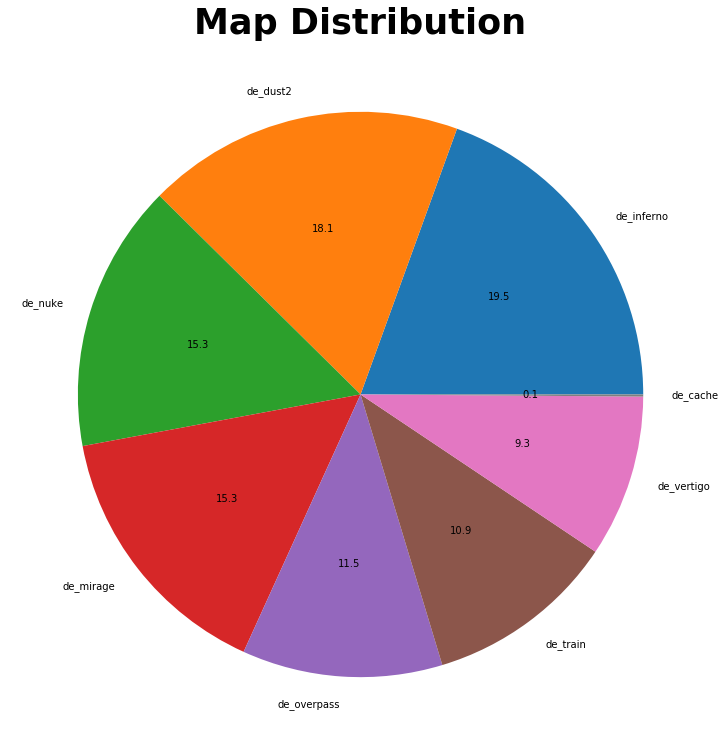

In [12]:
total = sum(data['map'].value_counts())

index = []
counts = []
for i,j in zip(data['map'].value_counts(),data['map'].value_counts().index):
    index.append(j)
    counts.append(round((i/total)*100,2))

xx = counts
fig, ax = plt.subplots(figsize=(13,13))
ax.pie(xx, labels=index, autopct="%1.1f");
ax.set_title("Map Distribution",fontsize=35,fontweight='bold')




The analysis on map variable shows that the out of all the rounds in the data set, de_inferno map was selected the most with with percentage of 19.5%

#### Bomb Planted

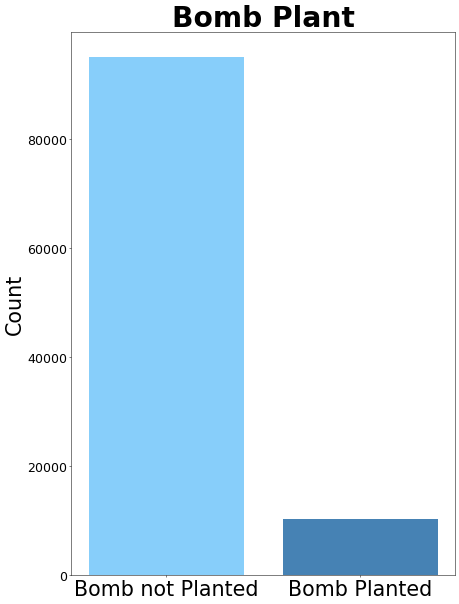

In [13]:
data.bomb_planted.value_counts()

labels = ['Bomb not Planted', 'Bomb Planted']
freq = data.bomb_planted.value_counts()

fig, ax = plt.subplots(figsize=(11,16), dpi=45)
colors = ['lightskyblue', 'steelblue']

ax.bar(labels,freq, align='center', color=colors)


ax.set_ylabel("Count" ,fontsize=33)

ax.set_title("Bomb Plant",fontsize=45,fontweight='bold')
plt.xticks(fontsize=33)
plt.yticks(fontsize=20)




ax

Looking at the bar chart we can conclude that in most of the rounds, the terrorist team have failed the bomb

#### Health and Armor

In [14]:
print("Average health of terrorist team is {}".format(round(data.t_health.mean(),1)))
print("Average health of counter terrorist team is {}\n".format(round(data.ct_health.mean(),1)))

print("Average armor of terrorist team is {}".format(round(data.t_armor.mean(),1)))
print("Average armor of counter terrorist team is {}\n".format(round(data.ct_armor.mean(),1)))

print("The results show that counter terrorist team was slightly better than terrorits in terms of health and armor score.")




Average health of terrorist team is 398.8
Average health of counter terrorist team is 407.2

Average armor of terrorist team is 302.2
Average armor of counter terrorist team is 313.9

The results show that counter terrorist team was slightly better than terrorits in terms of health and armor score.


#### Money

In [15]:
print("Average amount of money terrorist had in a round is {}".format(round(data.t_money.mean(),1)))
print("Average amount of money counter terrorist had in a round is {}\n".format(round(data.ct_money.mean(),1)))

print("Maximum amount of money terrorist had in a round is {}".format(round(data.t_money.max(),1)))
print("Maximum amount of money counter terrorist had in a round is {}\n".format(round(data.ct_money.max(),1)))

print("Minimum amount of money terrorist had in a round is {}".format(round(data.t_money.min(),1)))
print("Minimum amount of money counter terrorist had in a round is {}\n".format(round(data.ct_money.min(),1)))

print("Total amount of money terrorist had in all rounds is {}".format(round(data.t_money.sum(),1)))
print("Total amount of money counter terrorist had in all rounds is {}\n".format(round(data.ct_money.sum(),1)))

print("Looking at the results of the data, I can certainly say that terrorists always had an upper had compared to counter terrorists in terms of money in all aspects")



Average amount of money terrorist had in a round is 9844.4
Average amount of money counter terrorist had in a round is 7975.3

Maximum amount of money terrorist had in a round is 42400.0
Maximum amount of money counter terrorist had in a round is 32500.0

Minimum amount of money terrorist had in a round is 0.0
Minimum amount of money counter terrorist had in a round is 0.0

Total amount of money terrorist had in all rounds is 1035216400.0
Total amount of money counter terrorist had in all rounds is 838666400.0

Looking at the results of the data, I can certainly say that terrorists always had an upper had compared to counter terrorists in terms of money in all aspects


#### Grenades

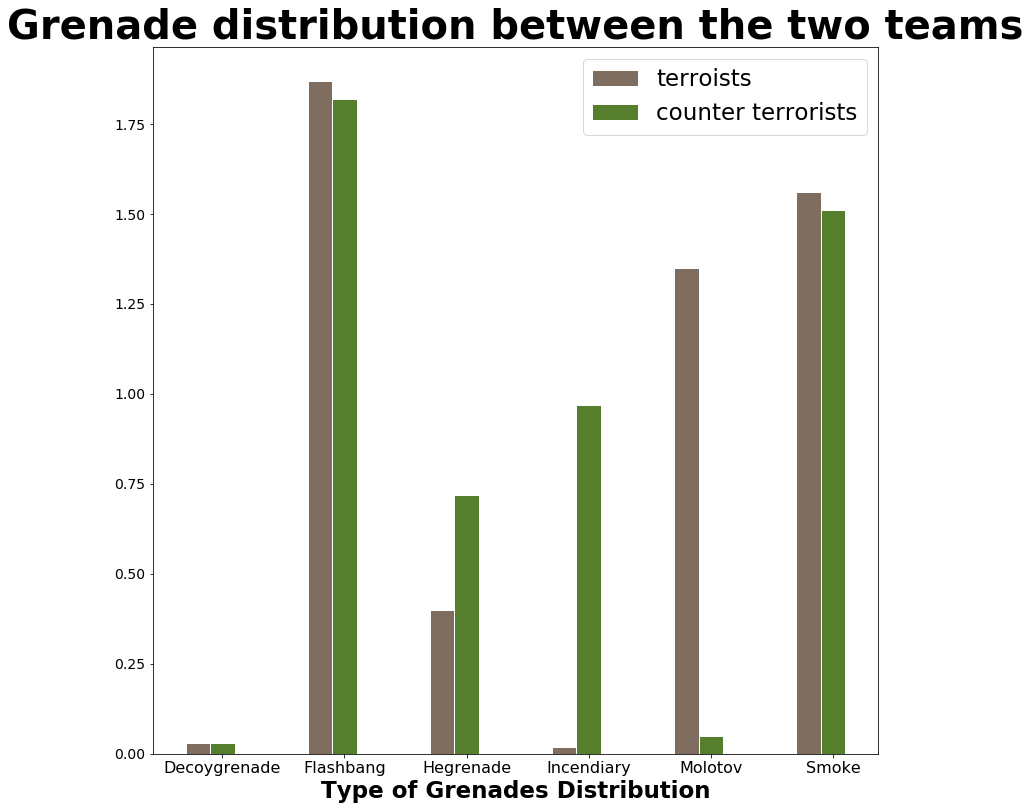

In [22]:
import numpy as np

avg_t_grenades = [round(data.t_grenade_decoygrenade.mean(),2),
                 round(data.t_grenade_flashbang.mean(),2),
                 round(data.t_grenade_hegrenade.mean(),2),
                 round(data.t_grenade_incendiarygrenade.mean(),2),
                 round(data.t_grenade_molotovgrenade.mean(),2),
                 round(data.t_grenade_smokegrenade.mean(),2)]

avg_ct_grenades = [round(data.ct_grenade_decoygrenade.mean(),2),
                 round(data.ct_grenade_flashbang.mean(),2),
                 round(data.ct_grenade_hegrenade.mean(),2),
                 round(data.ct_grenade_incendiarygrenade.mean(),2),
                 round(data.ct_grenade_molotovgrenade.mean(),2),
                 round(data.ct_grenade_smokegrenade.mean(),2)]

# set width of bar
barWidth = 0.20

r1 = np.arange(len(avg_t_grenades))
r2 = [x + barWidth for x in r1]


plt.bar(r1,avg_t_grenades, color='#7f6d5f', width=barWidth, edgecolor='white', label='terroists')
plt.bar(r2, avg_ct_grenades, color='#557f2d', width=barWidth, edgecolor='white', label='counter terrorists')



plt.xlabel('Type of Grenades Distribution', fontweight='bold',fontsize=23)
plt.xticks([r + barWidth for r in range(len(avg_t_grenades))], ['Decoygrenade', 'Flashbang', 'Hegrenade', 'Incendiary', 'Molotov','Smoke'])
 
# Create legend & Show graphic
plt.rcParams["figure.figsize"] = (13,13)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.legend(fontsize=23)
plt.title("Grenade distribution between the two teams",fontsize=40,fontweight='bold')
plt.show()


#### Round Winners

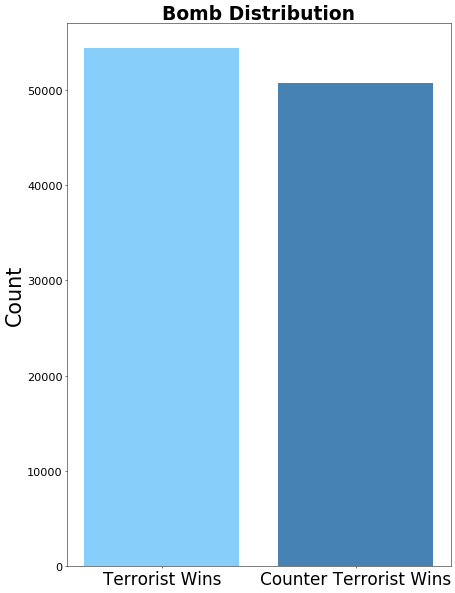

In [17]:
labels = ['Terrorist Wins', 'Counter Terrorist Wins']
freq = data.round_winner.value_counts()

fig, ax = plt.subplots(figsize=(11,16), dpi=45)
colors = ['lightskyblue', 'steelblue']

ax.bar(labels,freq, align='center', color=colors)

ax.set_ylabel("Count")
ax.set_title("Bomb Distribution",fontweight='bold',fontsize= "30")
plt.xticks(fontsize=27)
plt.yticks(fontsize=18)

ax.set_ylabel("Count" ,fontsize=33)

ax

## Section Four (Classification Model)


#### Gaussian Naive Bayes Classifier


GNB Score: 0.73
Classification Report :
              precision    recall  f1-score   support

          CT       0.69      0.79      0.74     15168
           T       0.78      0.67      0.72     16380

    accuracy                           0.73     31548
   macro avg       0.73      0.73      0.73     31548
weighted avg       0.74      0.73      0.73     31548



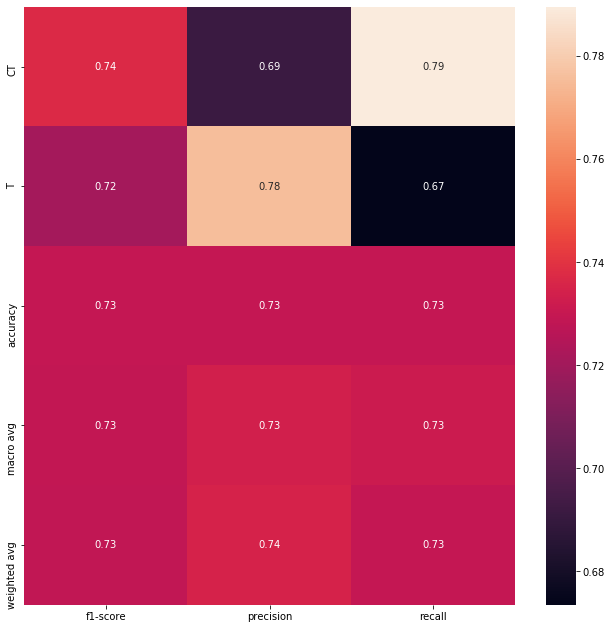

In [18]:
gnb = GaussianNB()
Xtrain, Xtest, ytrain, ytest = train_test_split(data.iloc[:,[7,8]],data.iloc[:,-1], test_size=0.3, random_state=6)


ypred = gnb.fit(Xtrain, ytrain).predict(Xtest)
score = accuracy_score(ytest, ypred, normalize = True)
print("GNB Score: {}".format(round(score,2)))

cr = classification_report(ytest, ypred,output_dict=True)

#Printing classification report
print("Classification Report :")
print(classification_report(ytest, ypred))

#visualizing classification report
fig, ax = plt.subplots(figsize=(11,11))        
sns.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot=True,ax=ax)

#### Decision Tree (Part One)

In [19]:
#Using the dataframe df which has the original raw data to make a baseline decision tree classification.

#Removing all NA values
df = df.dropna()

# Encoding Map and Bomb_planted variable as they are categorical data.

df["map"] = df["map"].astype('category')
df["map_encoded"] = df["map"].cat.codes

df["bomb_planted"] = df["bomb_planted"].astype('category')
df["bomb_planted_encoded"] = df["bomb_planted"].cat.codes

Classification Report :
              precision    recall  f1-score   support

          CT       0.70      0.84      0.76     12898
           T       0.80      0.65      0.72     13199

    accuracy                           0.74     26097
   macro avg       0.75      0.74      0.74     26097
weighted avg       0.75      0.74      0.74     26097



37282

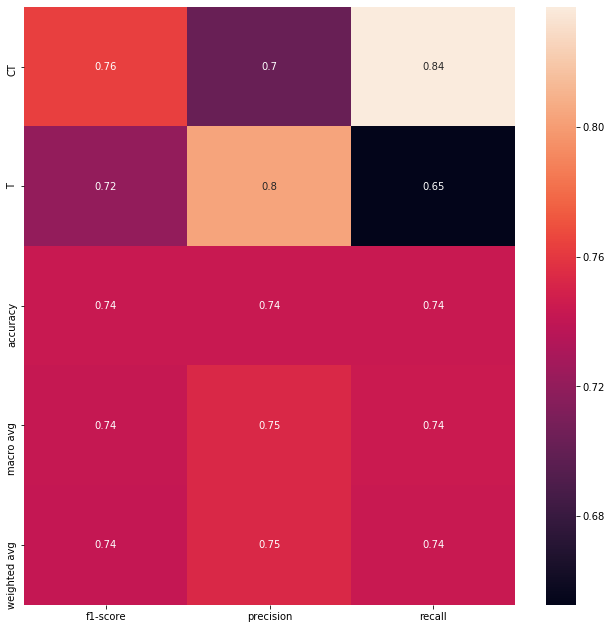

In [20]:

# Splitting the data into test and train while using all the features
X = df.iloc[:,[0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,30]]
y = df.round_winner

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=67)

from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=5, random_state=1)

# Fit our training data
treeclf.fit(Xtrain, ytrain)

cr = classification_report(ytrain, treeclf.predict(Xtrain),output_dict=True)

#Printing classification report
print("Classification Report :")
print(classification_report(ytrain, treeclf.predict(Xtrain)))

#visualizing classification report
fig, ax = plt.subplots(figsize=(11,11))        
sns.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot=True,ax=ax)
len(df)

#### Decision Tree (Part Two)

Classification Report :
              precision    recall  f1-score   support

          CT       0.71      0.74      0.73     35675
           T       0.75      0.72      0.73     37935

    accuracy                           0.73     73610
   macro avg       0.73      0.73      0.73     73610
weighted avg       0.73      0.73      0.73     73610



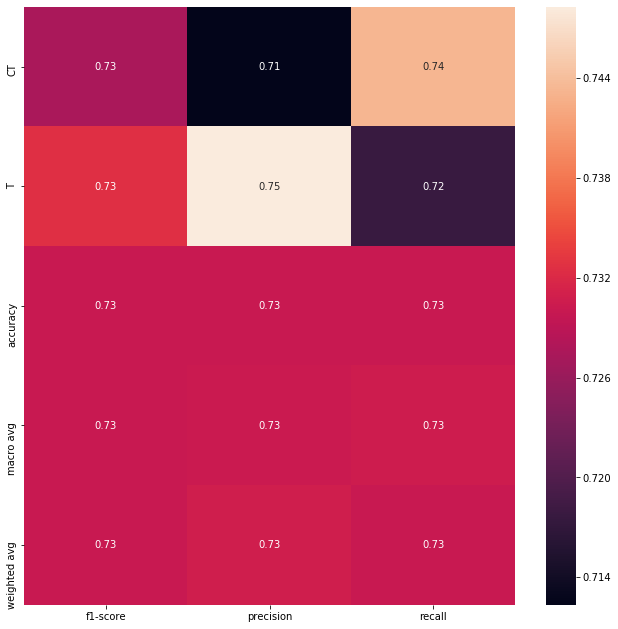

In [21]:
#Selecting relevant features
X = data.iloc[:,[7,12,13,0]]
y = data.round_winner

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=100)

treeclf = DecisionTreeClassifier(max_depth=5, random_state=1)

# Fit our training data
treeclf.fit(Xtrain, ytrain)


cr = classification_report(ytrain, treeclf.predict(Xtrain),output_dict=True)

#Printing classification report
print("Classification Report :")
print(classification_report(ytrain, treeclf.predict(Xtrain)))

#visualizing classification report
fig, ax = plt.subplots(figsize=(11,11))        
sns.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot=True,ax=ax)


Looking at the classification report of both the models, I can see a lot of similarities in the results. The first model has all the features in it meanwhile the second model is only built upon 4 relevant features. Precision Recall and F1 have almost similar scores but I would still conclude the second model which used only relevant features and manipulated data as the more accurate model compared to the other mainly because of size of the data. 
The data first model used had no manipulation in it, all the rows containing NA values were removed which shrinked the rows from 122410 to 37282 with authentic and not imputed/replaced data. Meanwhile, apart from a few deleted rows, the data used for the second model had imputed/replaced missing values based on the mean, median or mode approach which may have caused some biasness in the result. In this second model, 105158 rows were in the data.

## Summary


This was an interesting dataset which covered various statistical and mathematical techniques. I initially faced problem dealing with missing values as their is no one right solution to this problem. I had to do thorough research before choosing the best possible option. Apart from that, I got the chance to implement interesting visualizations to helped present the insights in a better way. I believe, decision tree classifier would be more suited to the data according the classification reports.